<a href="https://colab.research.google.com/github/oreomcflurryyy/data-analysis/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
!kaggle datasets download -d yasserh/titanic-dataset
!unzip "titanic-dataset"

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic-dataset.zip
replace Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Survival Analysis

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

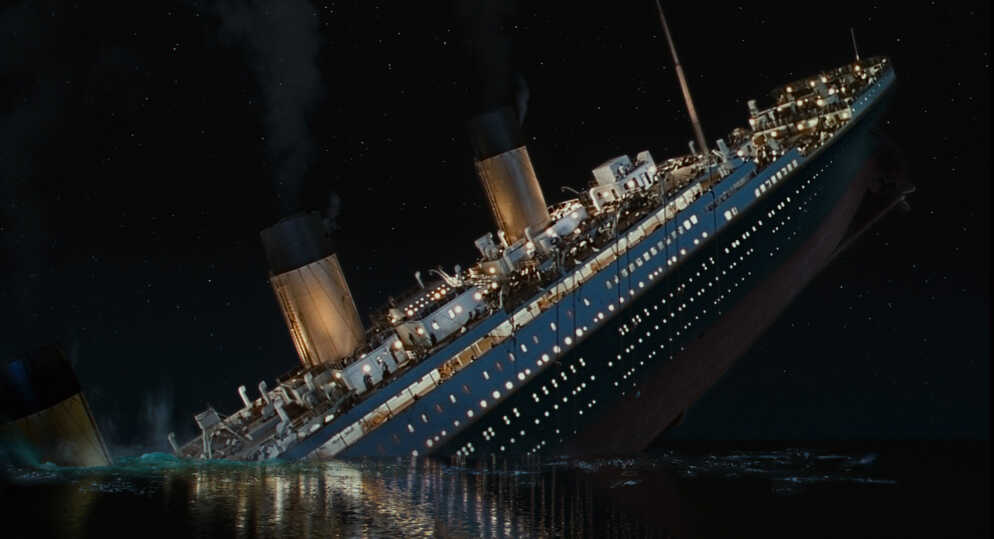

In [199]:
Image(filename='/content/titanic_custom-a7161a7b82be4249365df5349d977dc0a652102a.jpg', width=750, height=400)

In [154]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Preprocessing

In [156]:
def extract_title(name):
    if 'Mr.' in name:
        return 'Mr'
    elif 'Mrs.' in name:
        return 'Mrs'
    elif 'Miss.' in name:
        return 'Miss'
    elif 'Master' in name:
        return 'Master'
    else:
        return 'Other'

In [157]:
data['Name'] = data['Name'].apply(extract_title)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


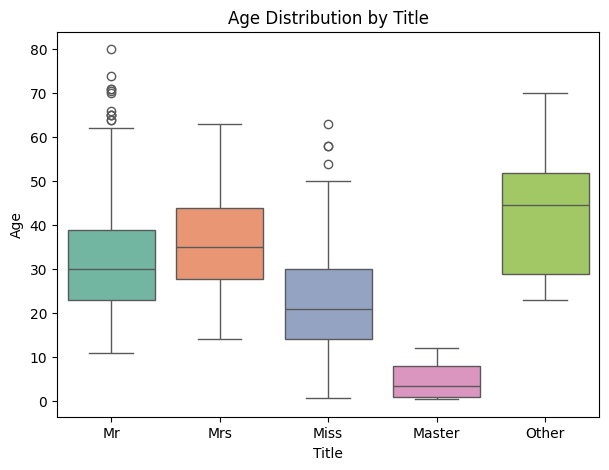

In [158]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Name', y='Age', data=data, hue='Name', palette='Set2', legend=False)
plt.title('Age Distribution by Title')
plt.xlabel('Title')
plt.ylabel('Age')
plt.show()

In [159]:
data['Age'] = data['Age'].fillna(data.groupby('Name')['Age'].transform('median'))
data = data.dropna(subset=['Fare'])
data.loc[:, 'Cabin'] = data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,0,S


### Exploratory Data Analysis

In [160]:
survived_passengers = data[data['Survived'] == 1]
percentage_survived = (len(survived_passengers) / len(data)) * 100
print(f'{percentage_survived:.2f}% of total passengers survived.')

38.38% of total passengers survived.


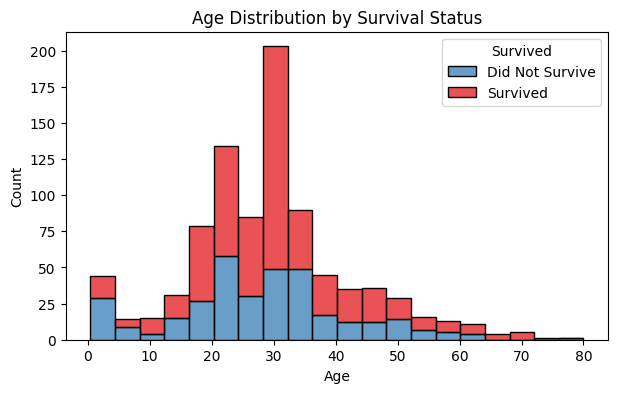

In [161]:
plt.figure(figsize=(7, 4))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', palette='Set1', bins=20)

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

**Age Insights:**

- There is a higher proportion of survivors in the age group of 25-30 years.
- The distribution of survivors and non-survivors is low or almost balanced among the younger and older age groups.

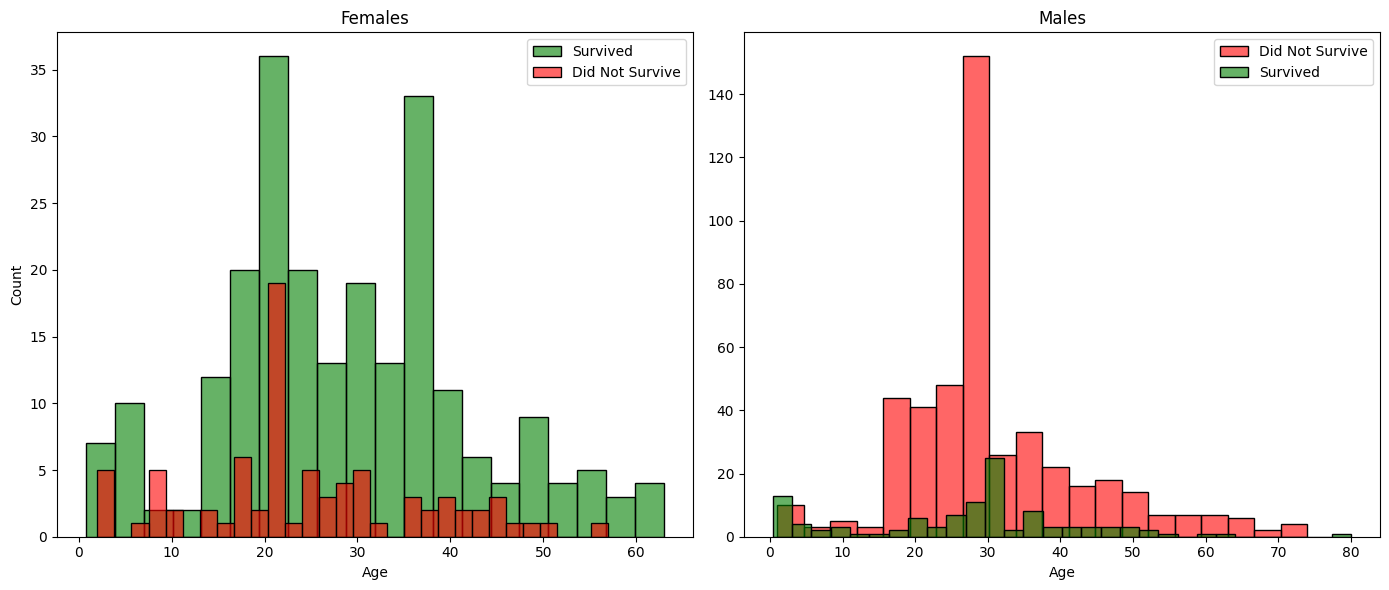

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
female_data = data[data['Sex'] == 'female'].reset_index(drop=True)
male_data = data[data['Sex'] == 'male'].reset_index(drop=True)

# Plot for female data
sns.histplot(data=female_data[female_data['Survived'] == 1], x='Age', color='green', bins=20, ax=axes[0], label='Survived', alpha=0.6)
sns.histplot(data=female_data[female_data['Survived'] == 0], x='Age', color='red', bins=30, ax=axes[0], label='Did Not Survive', alpha=0.6)
axes[0].set_title('Females')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot for male data
sns.histplot(data=male_data[male_data['Survived'] == 0], x='Age', color='red', bins=20, ax=axes[1], label='Did Not Survive', alpha=0.6)
sns.histplot(data=male_data[male_data['Survived'] == 1], x='Age', color='green', bins=30, ax=axes[1], label='Survived', alpha=0.6)
axes[1].set_title('Males')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('')
axes[1].legend()

plt.tight_layout()
plt.show()

In [163]:
# Calculate the percentage of who survived
female_survival_rate = len(data[(data['Sex'] == 'female') & (data['Survived'] == 1)]) / len(data[data['Sex'] == 'female']) * 100
male_survival_rate = len(data[(data['Sex'] == 'male') & (data['Survived'] == 1)]) / len(data[data['Sex'] == 'male']) * 100

print(f"Percentage of females who survived: {female_survival_rate:.2f}%")
print(f"Percentage of males who survived: {male_survival_rate:.2f}%")

Percentage of females who survived: 74.20%
Percentage of males who survived: 18.89%


**Sex Insights:**

Clearly, females had a higher chance of survival than males.

In [164]:
cabin_by_class = data.groupby(['Pclass', 'Cabin'])['PassengerId'].count().unstack()
cabin_by_class['Total'] = cabin_by_class.sum(axis=1)
cabin_by_class['Cabin Percentage (%)'] = (cabin_by_class[1] / cabin_by_class['Total']) * 100
print(cabin_by_class[['Total', 'Cabin Percentage (%)']])

Cabin   Total  Cabin Percentage (%)
Pclass                             
1         216             81.481481
2         184              8.695652
3         491              2.443992


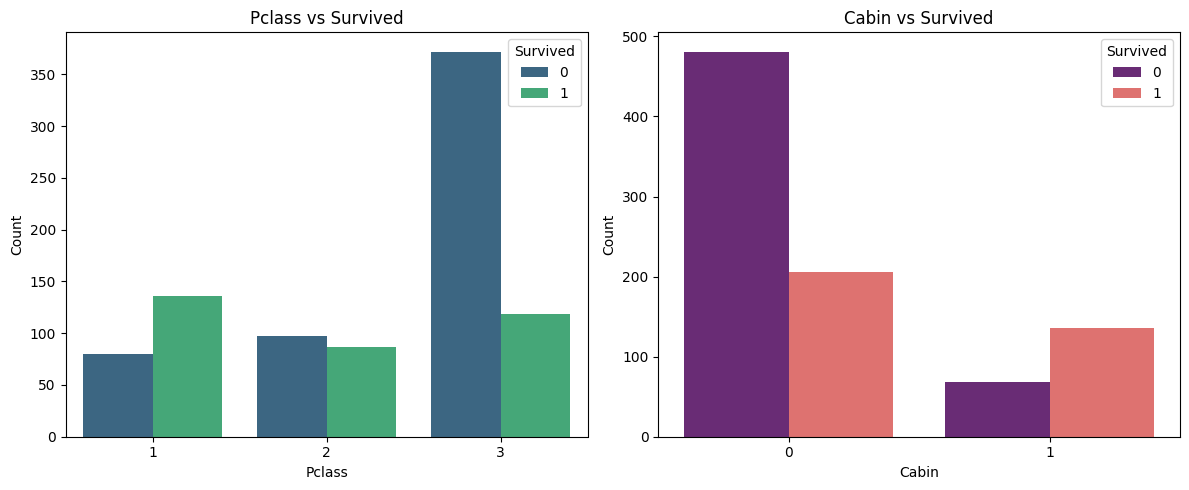

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Pclass vs Survived
sns.countplot(x='Pclass', hue='Survived', data=data, palette='viridis', ax=axes[0])
axes[0].set_title('Pclass vs Survived')
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Count')


# Plot Cabin vs Survived
sns.countplot(x='Cabin', hue='Survived', data=data, palette='magma', ax=axes[1])
axes[1].set_title('Cabin vs Survived')
axes[1].set_xlabel('Cabin')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Class Insights:**

- Having a cabin, which indicates a better financial status, significantly increased the chances of survival.
- Passengers in 1st class had greater than 50% chances of survival, those in 2nd class had approximately 50% chances, and those in 3rd class had less than 30% chances of survival.

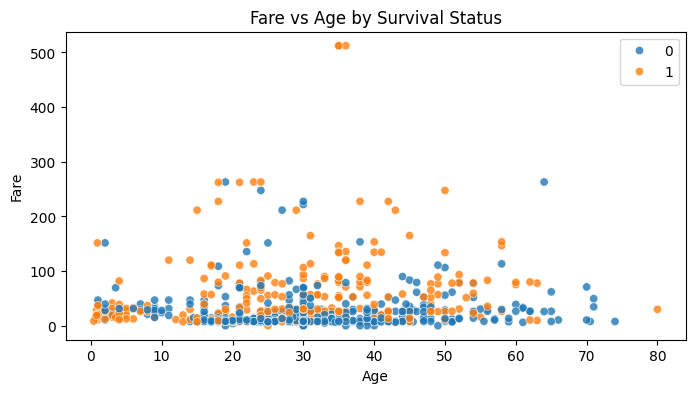

In [166]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', alpha=0.8)

plt.title('Fare vs Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.grid(False)
plt.show()

**Fare Insights:**

- Passengers who paid more had a higher chance of survival compared to those who paid less.
- It's fascinating to see that even lower-class children and infants had a higher survival rate due to the prioritization of families with children onto the lifeboats. In a twist reminiscent of Caledon Hockley's clever move—where he used a child to secure a spot—he wasn't the only one with crafty tactics. This prioritization played a significant role in their increased chances of survival.

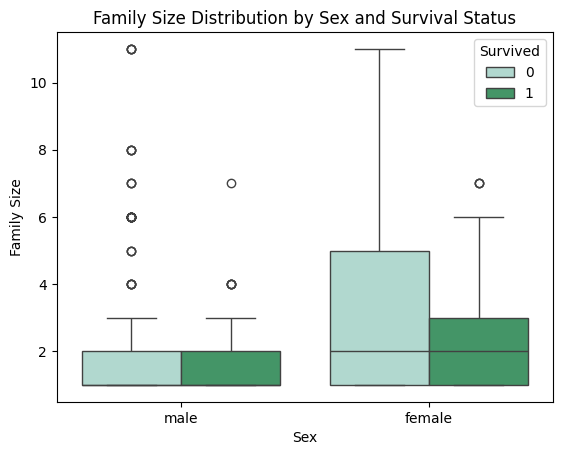

In [167]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
sns.boxplot(x='Sex', y='FamilySize', hue='Survived', data=data, palette='BuGn')

plt.title('Family Size Distribution by Sex and Survival Status')
plt.xlabel('Sex')
plt.ylabel('Family Size')
plt.legend(title='Survived')
plt.show()

In [168]:
single_men = len(data[(data['Sex'] == 'male') & (data['FamilySize'] == 1)])
single_women = len(data[(data['Sex'] == 'female') & (data['FamilySize'] == 1)])
total_passengers = len(data)

single_men_percentage = (single_men / total_passengers) * 100
single_women_percentage = (single_women / total_passengers) * 100

print(f"Percentage of single men: {single_men_percentage:.2f}%")
print(f"Percentage of single women: {single_women_percentage:.2f}%")

Percentage of single men: 46.13%
Percentage of single women: 14.14%


Women rarely traveled alone, with only 14% doing so compared to 46% of all passengers who were men. Yet, they had higher total survival rates. Was it chivalry at play?

In [169]:
# Calculate survival rate by embarkation point for females
female_survival = data[data['Sex'] == 'female'].groupby('Embarked')['Survived'].mean().reset_index()
female_survival['Sex'] = 'Female'

# Calculate survival rate by embarkation point for males
male_survival = data[data['Sex'] == 'male'].groupby('Embarked')['Survived'].mean().reset_index()
male_survival['Sex'] = 'Male'

survival_by_sex = pd.concat([female_survival, male_survival])
survival_df = survival_by_sex.pivot(index='Embarked', columns='Sex', values='Survived')
print(survival_df)

Sex         Female      Male
Embarked                    
C         0.876712  0.305263
Q         0.750000  0.073171
S         0.689655  0.174603


**Embark Insights:**
- As for a man, you are more likely to survive if embark in Cherbourg compare to Southampton or Queenstown.
- Jack boarded from Southampton for that matter, sadly.

## Survival Prediction

**Baseline Accuracy:**

	•	If you predict all passengers survived (or all died), the accuracy is around ~62% (since around 38% survived).
	•	A simple “women survived, men didn’t” rule gives about ~74% accuracy.

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [171]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Name'], drop_first=True)
data.drop(['SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,Fare,Cabin,FamilySize,Sex_male,Embarked_Q,Embarked_S,Name_Miss,Name_Mr,Name_Mrs,Name_Other
0,1,0,3,22.0,7.2500,0,2,True,False,True,False,True,False,False
1,2,1,1,38.0,71.2833,1,2,False,False,False,False,False,True,False
2,3,1,3,26.0,7.9250,0,1,False,False,True,True,False,False,False
3,4,1,1,35.0,53.1000,1,2,False,False,True,False,False,True,False
4,5,0,3,35.0,8.0500,0,1,True,False,True,False,True,False,False


In [172]:
features = ['Pclass', 'Name_Miss', 'Name_Mr', 'Name_Mrs', 'Name_Other', 'Age', 'Fare', 'Cabin', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

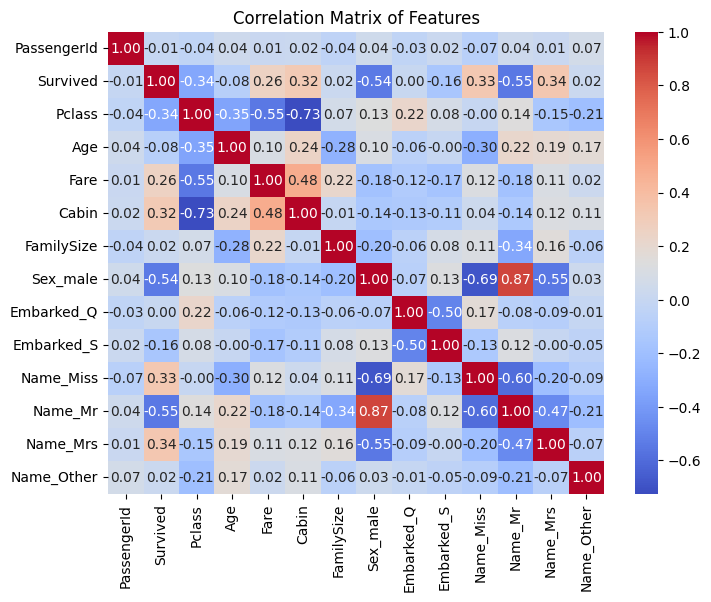

In [173]:
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import TunedThresholdClassifierCV

Simple Logistic Regression :

In [176]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=0))
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



Hyper Parameter Tuning :

In [177]:
# Define the pipeline with standardization and logistic regression
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('classifier', LogisticRegression(max_iter=200, tol=1e-2, random_state=0))
])

# Hyperparameter search
params = {
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__C': uniform(loc=0, scale=4),
    'classifier__penalty': ['l2', 'l1']
}

randomSCV = RandomizedSearchCV(pipeline, params, random_state=0, n_iter=100, cv=5)
search = randomSCV.fit(X_train, y_train)
print("Best parameters found: ", search.best_params_)

Best parameters found:  {'classifier__C': 0.28414423279154777, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [178]:
# Use the best parameters to create a new pipeline
base_lr = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('classifier', LogisticRegression(
        solver=search.best_params_['classifier__solver'], max_iter=200, tol=1e-2,
        C=search.best_params_['classifier__C'],
        penalty=search.best_params_['classifier__penalty'],
        random_state=1))
])

classifier_tuned = TunedThresholdClassifierCV(base_lr,
                                              scoring="balanced_accuracy")

# Cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(classifier_tuned, X_train, y_train, cv=kfold, scoring='balanced_accuracy')

# Fit the model
classifier_tuned.fit(X_train, y_train)

print(f"Cut-off point found at {classifier_tuned.best_threshold_:.3f}")
print(f"Cross-validated balanced accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

Cut-off point found at 0.434
Cross-validated balanced accuracy: 0.777 ± 0.039


In [179]:
logistic_model = pipeline.named_steps['classifier']
logistic_model.fit(pipeline.named_steps['scaler'].fit_transform(X_train), y_train)  # Fit the model using scaled data

# Get coefficients and intercept
coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-0.56989178 -0.09031889 -0.96163681  0.46033069 -0.14883784 -0.5209559
   0.13775582  0.33638236 -0.707209   -0.40675895 -0.08550282 -0.2283019 ]]
Intercept: [-0.69459364]


In [180]:
y_pred = classifier_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



Classic case of overfitting: Complex models with many hyperparameters can overfit the training data, capturing noise rather than the underlying pattern. Simpler models are less prone to this.

A simple logistic regression gives accuracy of `84%` while fine-tuned hyperparameterised logistic regression gives `83%` accuracy.

### Random Forest Classifier

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [182]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=0))
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.81      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



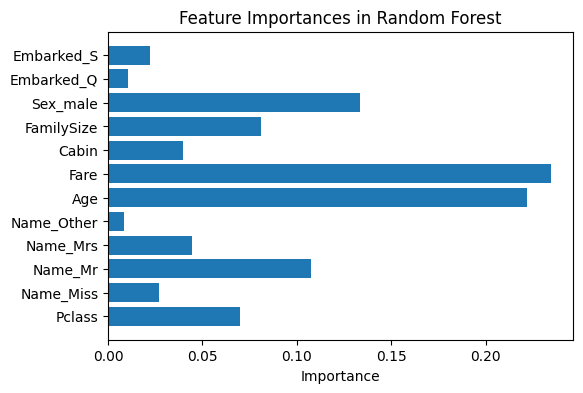

In [183]:
importances = pipeline.named_steps['classifier'].feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(6, 4))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.show()

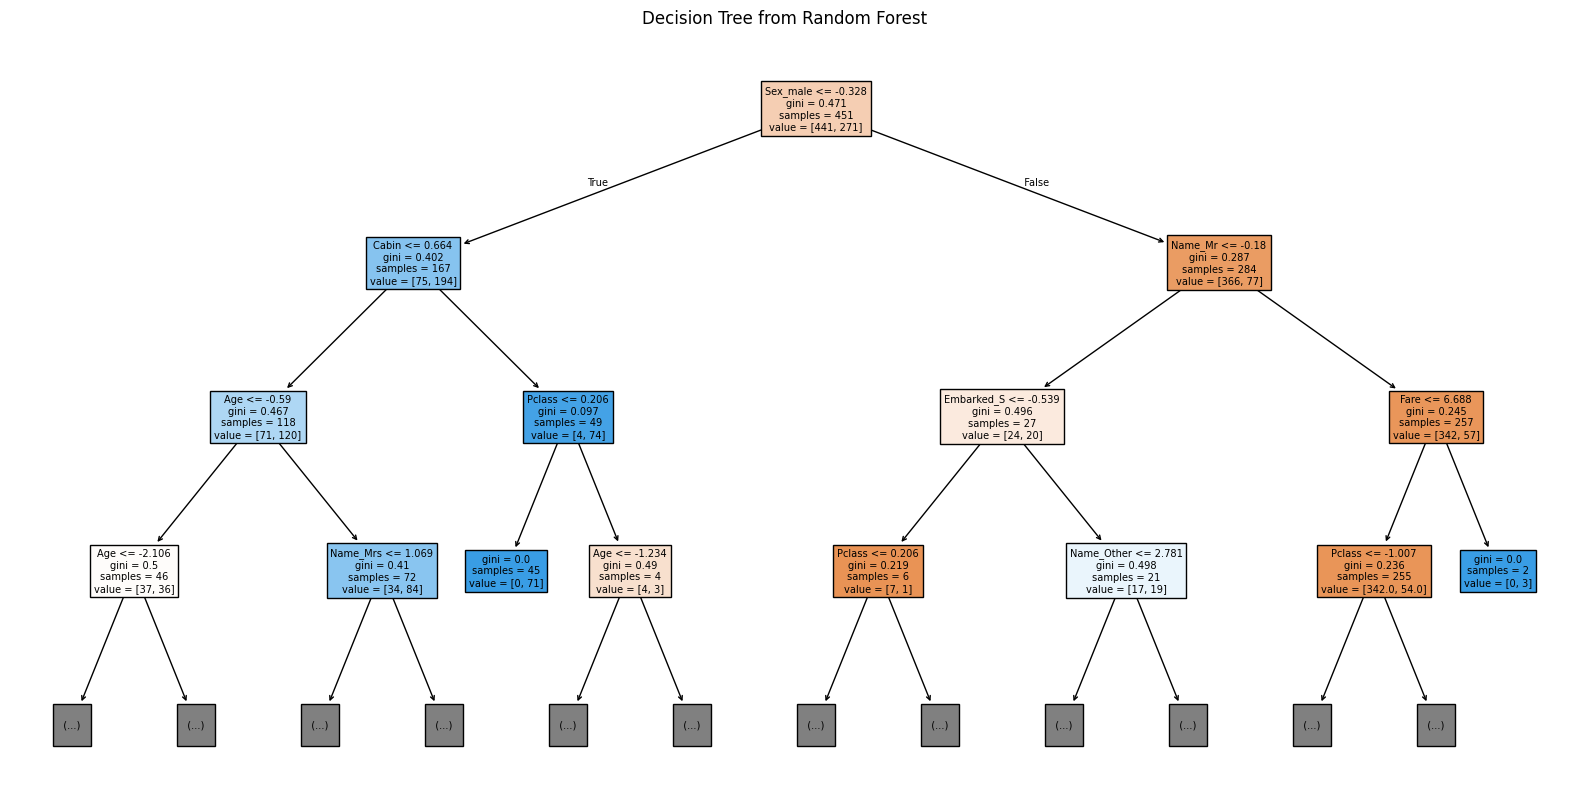

In [184]:
rf_classifier = pipeline.named_steps['classifier']

plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=features, filled=True, max_depth=3)
plt.title('Decision Tree from Random Forest')
plt.show()

### Ensemble Boosting

In [185]:
from scipy.stats import randint, uniform
from sklearn.ensemble import HistGradientBoostingClassifier

In [186]:
model = HistGradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



### Support Vector Classification

In [187]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [188]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=0))
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [189]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=0))
])

# Hyperparameter search
params = {
    'classifier__C': np.arange(0.1, 1, 0.1),
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__degree': list(range(2, 5))  # Only relevant for 'poly' kernel
}

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

gridSVC = GridSearchCV(pipeline, params, cv=kfold)
search = gridSVC.fit(X_train, y_train)
print("Best parameters found: ", search.best_params_)

Best parameters found:  {'classifier__C': 0.5, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


In [190]:
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



### Model Evaluation

In [191]:
models = {
    'Logistic Regression': 0.84,
    'Tuned Logistic Regression': 0.83,
    'Random Forest Classifier': 0.84,
    'Ensemble Boosting': 0.83,
    'Support Vector Classification': 0.82,
    'Tuned Support Vector Classification': 0.82
}

df = pd.DataFrame(list(models.items()), columns=['Model', 'Accuracy'])
df = df.sort_values('Accuracy', ascending=False)
df


,Model,Accuracy
0,Logistic Regression,0.84
2,Random Forest Classifier,0.84
1,Tuned Logistic Regression,0.83
3,Ensemble Boosting,0.83
4,Support Vector Classification,0.82
5,Tuned Support Vector Classification,0.82
